<a href="https://colab.research.google.com/github/DietzscheNostoevsky/Learning_Pytorch/blob/main/01_PyTorch_Workflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PyTorch Workflow


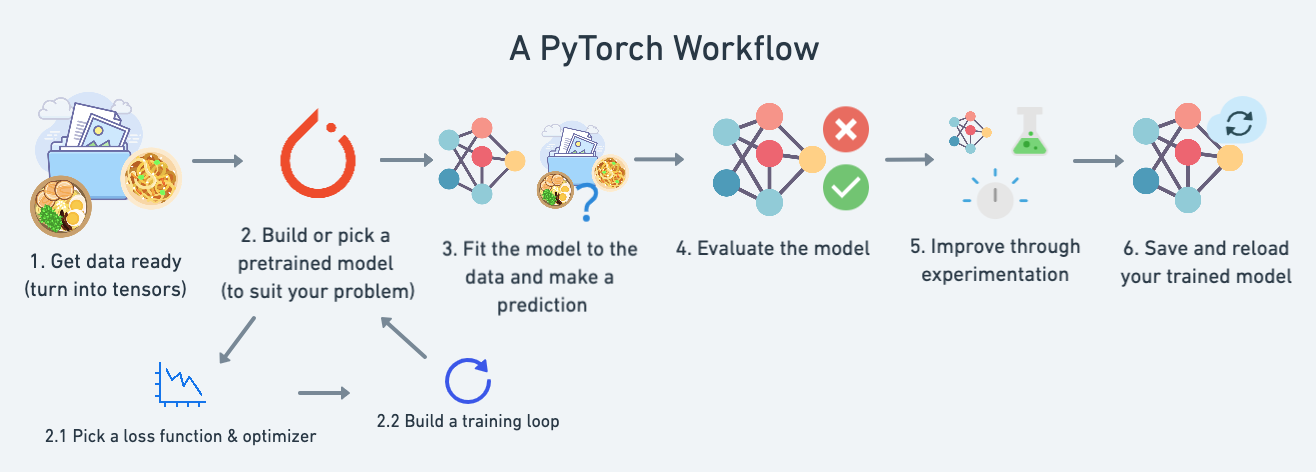

## Linear Regression using Pytorch

## Imports

In [1]:
import torch
from torch import nn 
import matplotlib.pyplot as plt

#Check pytorch version

torch.__version__

'2.0.0+cu118'

# 1. Data Preprocessing and Loading 

## Numerical Encoding of Data 

In [2]:
# Creating Data 

# Creating known parameters 
weight = 0.7 
bias = 0.3 

# Create data 
start = 0
end = 1 
step = 0.02 

X = torch.arange(start, end, step).unsqueeze(dim=1)
y = weight * X + bias 

X[:10], y[:10]

# X = features 
# y = labels

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

## Train-Test Split 

In [3]:
train_split = int(0.8 * len(X)) # 80% of the data as train data 
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)


(40, 40, 10, 10)

## Visualizing Data

In [4]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train, 
                     test_data=X_test, 
                     test_labels=y_test, 
                     predictions=None):
    """
    Plots training data, test data and compares predictions.
    """
    plt.figure(figsize=(10, 7))

    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", s=4, label="Training data")
    
    # Plot test data in green
    plt.scatter(test_data, test_labels, c="g", s=4, label="Testing data")

    if predictions is not None:
        # Plot the predictions in red (predictions were made on the test data)
        plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

    # Show the legend
    plt.legend(prop={"size": 14});

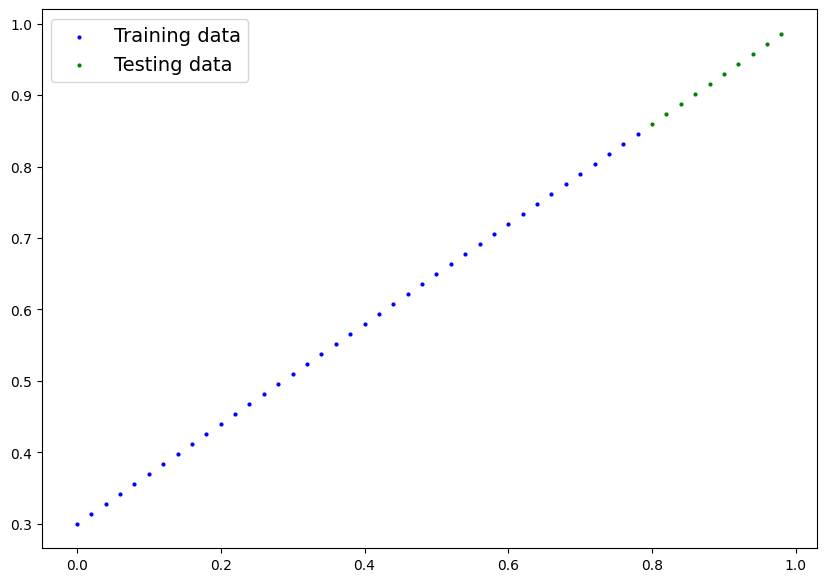

In [5]:
plot_predictions()

# 2. Bulding the Model

In [13]:
# Creating a Linear Regression model class 

class LinearRegressionModel(nn.Module): # base class for all nn models 
    def __init__(self):
        super().__init__()  #  super().__init__(), you are essentially calling the constructor of the superclass. 
                            # This allows you to initialize the inherited attributes and 
                            # perform any necessary setup that the parent class defines. 
                            # It ensures that the superclass's initialization logic 
                            # is executed before proceeding with the subclass's specific initialization.


        self.weights = nn.Parameter(torch.randn(1, # initialization
                                                dtype=torch.float),  
                                    requires_grad=True)  # upgrade this value through grad descent 
        self.bias = nn.Parameter(torch.randn(1, dtype=torch.float),
                                requires_grad=True)

    # Forward pass 
    def forward(self, x:torch.Tensor) -> torch.Tensor :
        return self.weights*x + self.bias   # Linear Regression 




In [16]:
# Model instantiation 

# randominzation with seed 
torch.manual_seed(73)

model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.0591], requires_grad=True),
 Parameter containing:
 tensor([0.4445], requires_grad=True)]

In [17]:
# Model state 
model_0.state_dict()

OrderedDict([('weights', tensor([0.0591])), ('bias', tensor([0.4445]))])

# Making Predictions

In [18]:
# making predictions with model : 

with torch.inference_mode():
    y_preds = model_0(X_test)

In [19]:
# Checking predictions 

print(F"Number of testing samples: {len(X_test)}") 
print(F"Number of predictions made: {len(y_preds)}")
print(F"Predicted values:\n{y_preds}")

Number of testing samples: 10
Number of predictions made: 10
Predicted values:
tensor([[0.4918],
        [0.4930],
        [0.4942],
        [0.4954],
        [0.4966],
        [0.4978],
        [0.4989],
        [0.5001],
        [0.5013],
        [0.5025]])


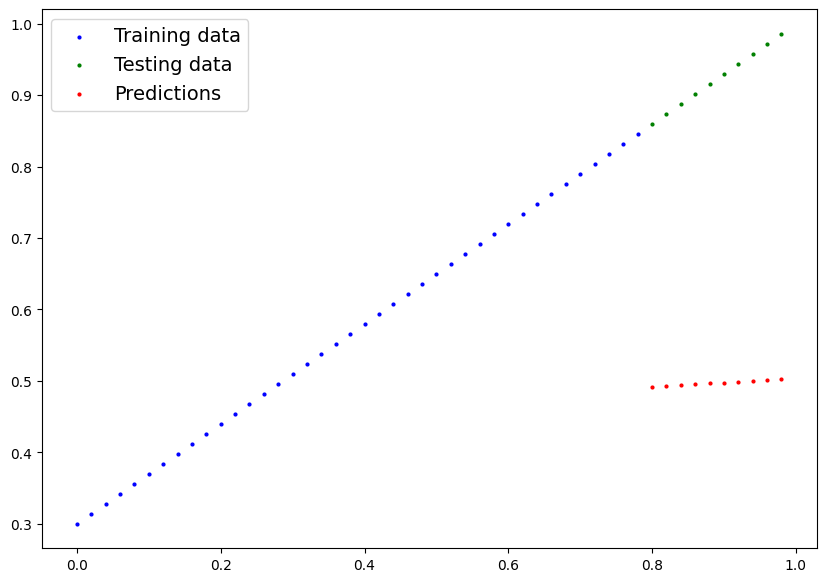

In [20]:
# Plot Predictions 

plot_predictions(predictions=y_preds)